# Looking at mask predictions

Running validation data through saved model to look at masks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

sys.path.append('../src')
from UNet2D import UNet2D
from datasets import MycetomaDataset
from metrics import batch_dice_coeff, bce_dice_loss, dice_coefficient
from postprocessing import threshold_mask, post_process_binary_mask

In [2]:
DATA_DIR = '../data'

In [3]:
train_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/training_dataset/**/*.jpg')])
val_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/validation_dataset/**/*.jpg')])

print(f"Train length: {len(train_paths)}")
print(f"Val length: {len(val_paths)}")

Train length: 537
Val length: 87


In [4]:
# Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [5]:
train_dataset = MycetomaDataset(train_paths, DATA_DIR)
val_dataset = MycetomaDataset(val_paths, DATA_DIR)

In [6]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

In [7]:
# Plot an image, along with prediction and ground truth
def plot_image(im, pred, gt):

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    ax[0].imshow(im)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(pred)
    ax[1].set_title('prediction')
    ax[1].axis('off')

    ax[2].imshow(gt)
    ax[2].set_title('GT')
    ax[2].axis('off')

    plt.show()

In [8]:
# Create and load model save
model = UNet2D(3, 1, 8)
state_dict = torch.load('../model_saves/updated_masks_longer2_best_model.pth', map_location=torch.device(device))

# Sometimes, the model dictionary keys contain 'module.' prefix which we don't want
remove_prefix = True

if remove_prefix:
    remove_prefix = 'module.'
    state_dict = {k[len(remove_prefix):] if k.startswith(remove_prefix) else k: v for k, v in state_dict.items()}

model.load_state_dict(state_dict)
model = model.to(device)

model.eval();

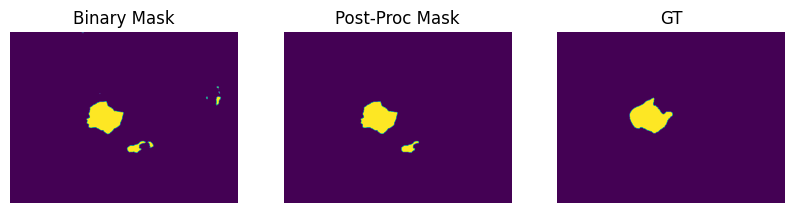

Dice score before postproc: 0.8303878903388977 vs after: 0.8548333644866943


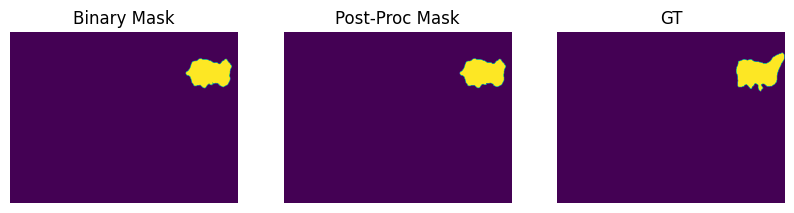

Dice score before postproc: 0.9007728695869446 vs after: 0.9001132845878601


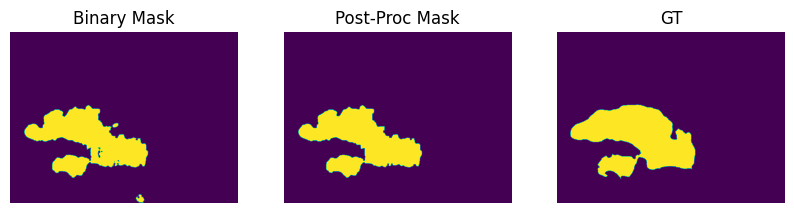

Dice score before postproc: 0.872517466545105 vs after: 0.8756340742111206


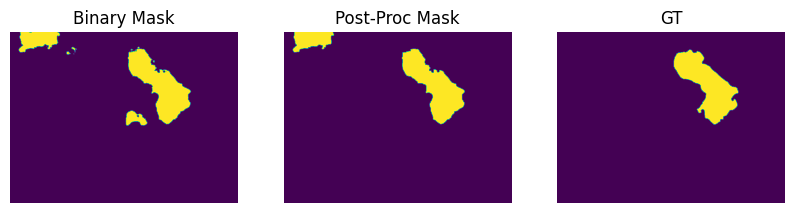

Dice score before postproc: 0.7745091915130615 vs after: 0.8088023066520691


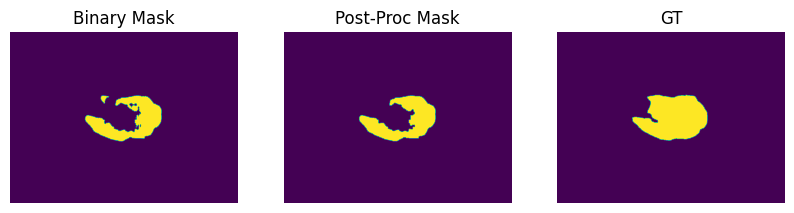

Dice score before postproc: 0.7520185708999634 vs after: 0.7475573420524597


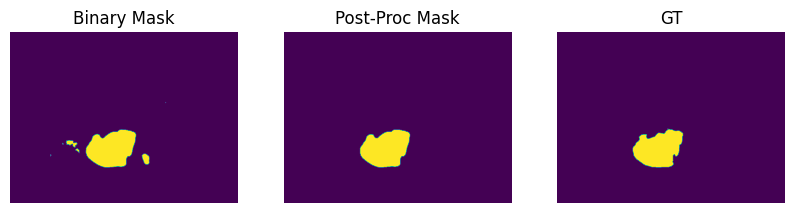

Dice score before postproc: 0.9411167502403259 vs after: 0.9781141877174377


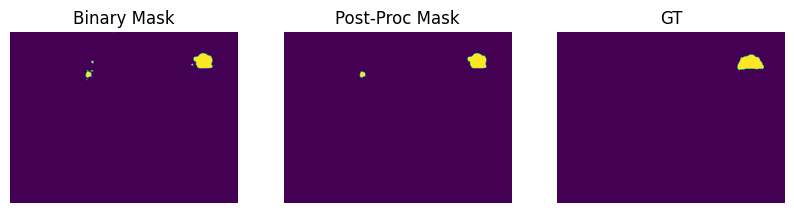

Dice score before postproc: 0.742395281791687 vs after: 0.7491699457168579


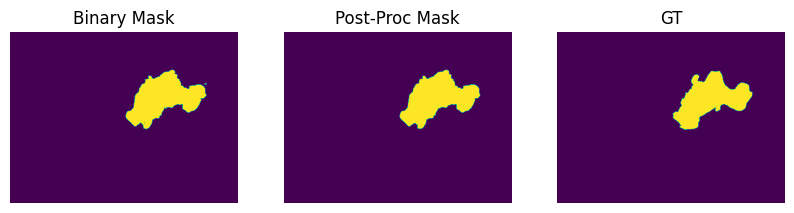

Dice score before postproc: 0.9266747832298279 vs after: 0.9273509979248047


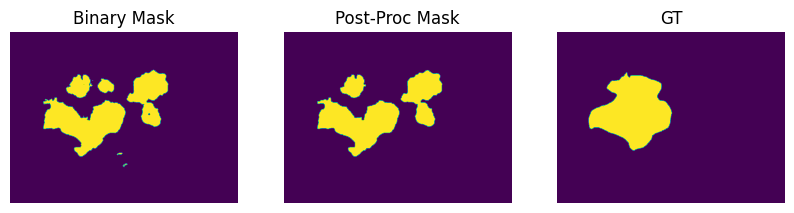

Dice score before postproc: 0.691706120967865 vs after: 0.6655384302139282


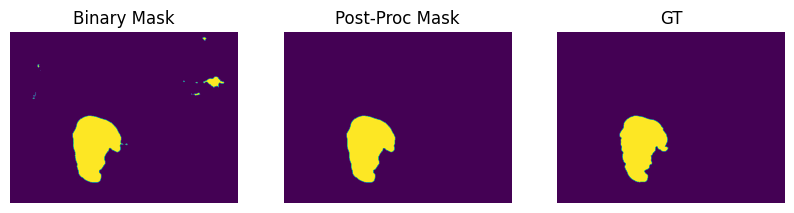

Dice score before postproc: 0.9475277662277222 vs after: 0.9768539667129517


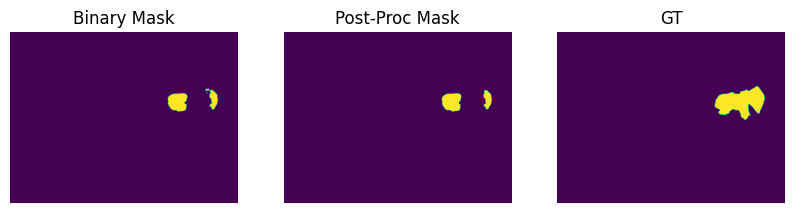

Dice score before postproc: 0.562774121761322 vs after: 0.5524516701698303


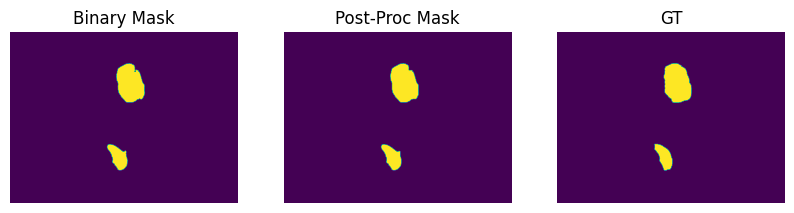

Dice score before postproc: 0.9527329802513123 vs after: 0.9533998966217041


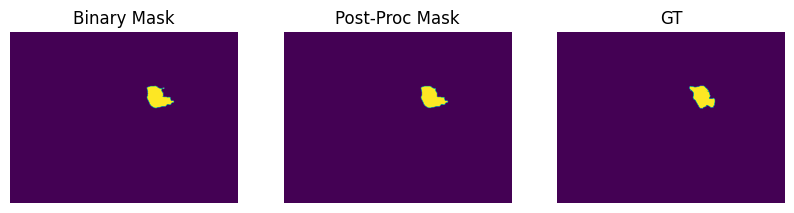

Dice score before postproc: 0.8709090948104858 vs after: 0.8725031614303589


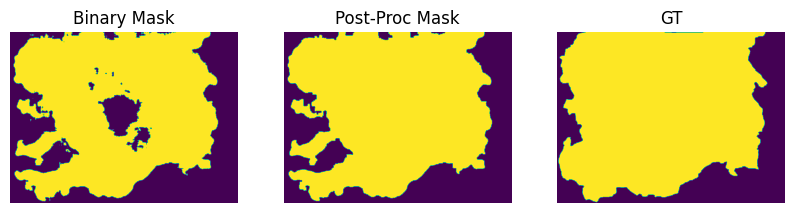

Dice score before postproc: 0.9242926239967346 vs after: 0.9500200152397156


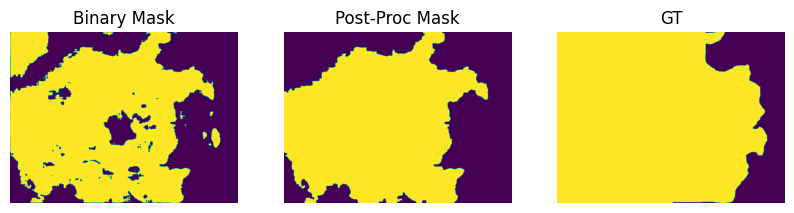

Dice score before postproc: 0.8420742750167847 vs after: 0.837181568145752


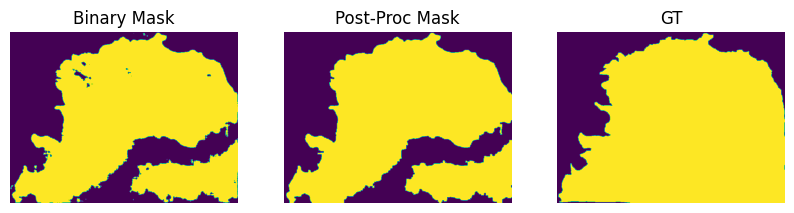

Dice score before postproc: 0.8975585103034973 vs after: 0.8986892700195312


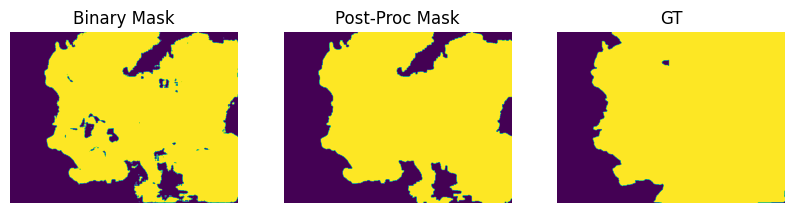

Dice score before postproc: 0.9236189723014832 vs after: 0.9303024411201477


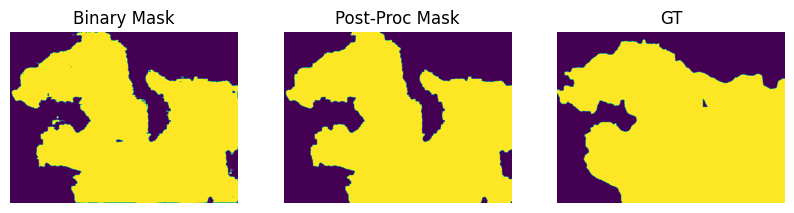

Dice score before postproc: 0.9274195432662964 vs after: 0.9281618595123291


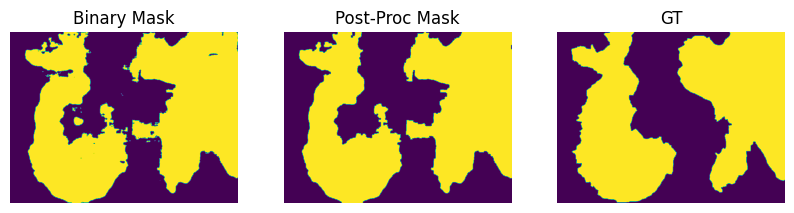

Dice score before postproc: 0.900505542755127 vs after: 0.90291827917099


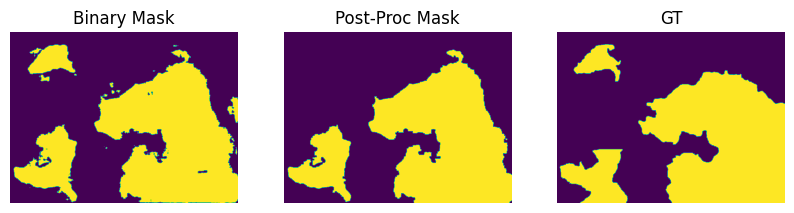

Dice score before postproc: 0.8811007738113403 vs after: 0.8582544326782227


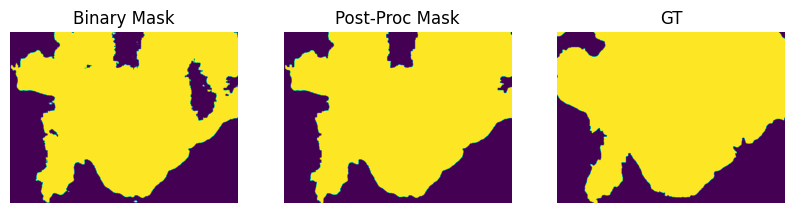

Dice score before postproc: 0.9257098436355591 vs after: 0.944999635219574


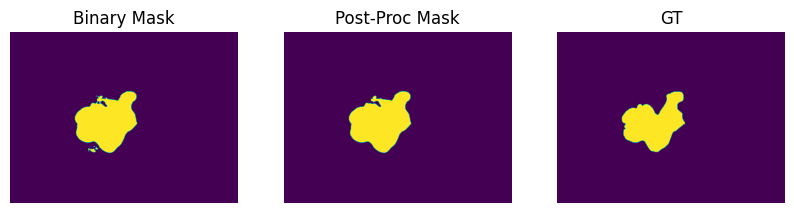

Dice score before postproc: 0.9350181221961975 vs after: 0.9405872225761414


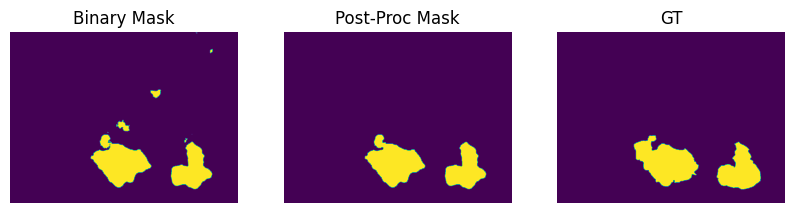

Dice score before postproc: 0.8788642883300781 vs after: 0.9001159071922302


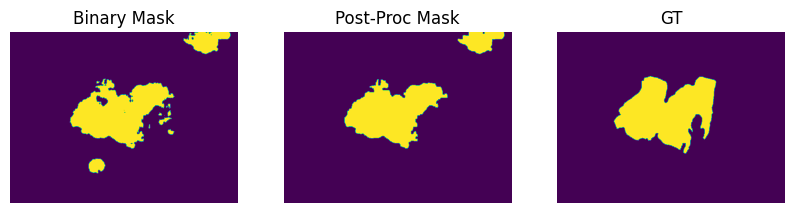

Dice score before postproc: 0.7877265214920044 vs after: 0.8134158253669739


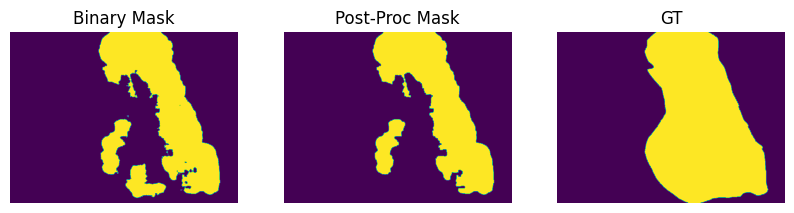

Dice score before postproc: 0.7844194173812866 vs after: 0.7468743920326233


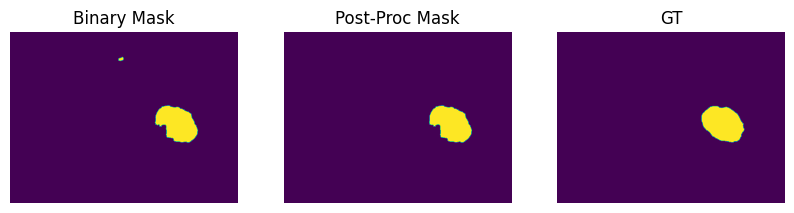

Dice score before postproc: 0.9331243634223938 vs after: 0.9391080737113953


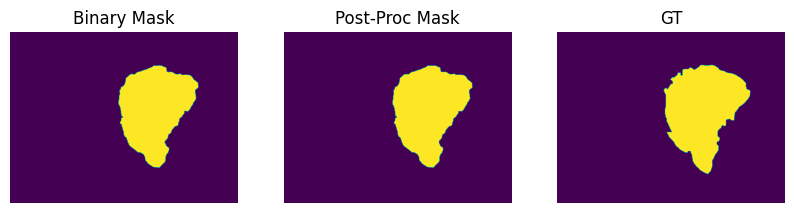

Dice score before postproc: 0.9475778937339783 vs after: 0.9476302862167358


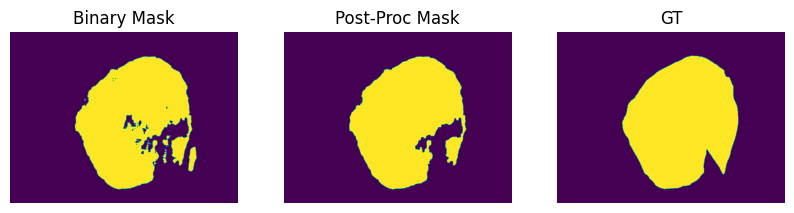

Dice score before postproc: 0.9318435192108154 vs after: 0.9430065155029297


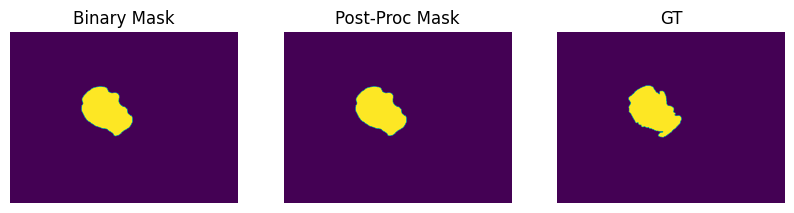

Dice score before postproc: 0.9688064455986023 vs after: 0.9688721895217896


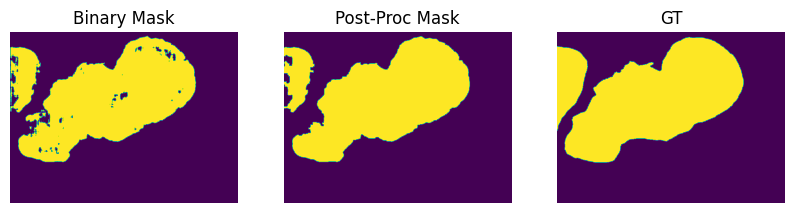

Dice score before postproc: 0.9543110728263855 vs after: 0.9551234245300293


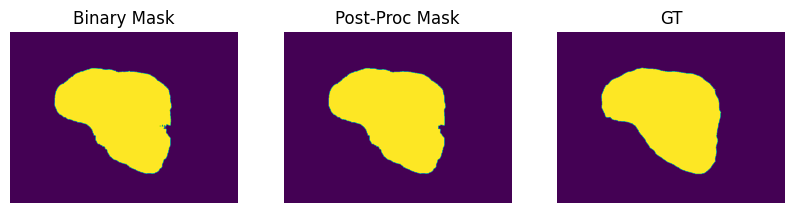

Dice score before postproc: 0.9811530709266663 vs after: 0.981223464012146


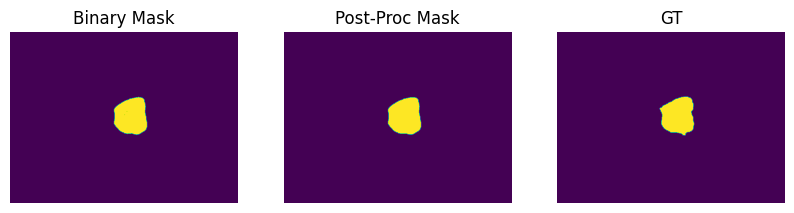

Dice score before postproc: 0.9721472263336182 vs after: 0.9719399809837341


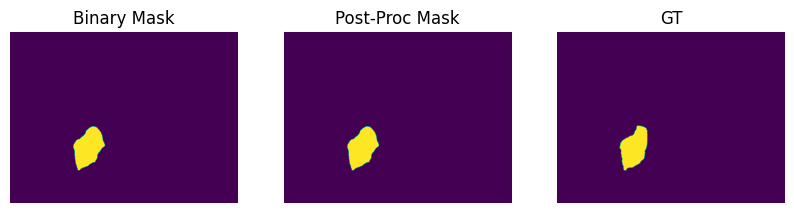

Dice score before postproc: 0.9342480301856995 vs after: 0.9341901540756226


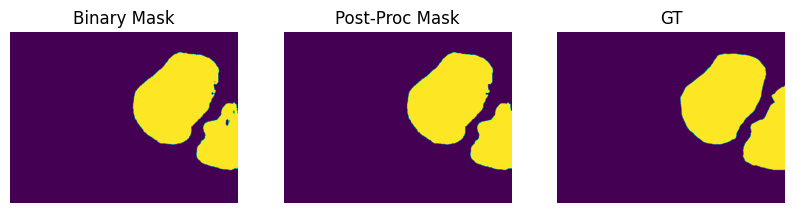

Dice score before postproc: 0.9727029800415039 vs after: 0.9738199710845947


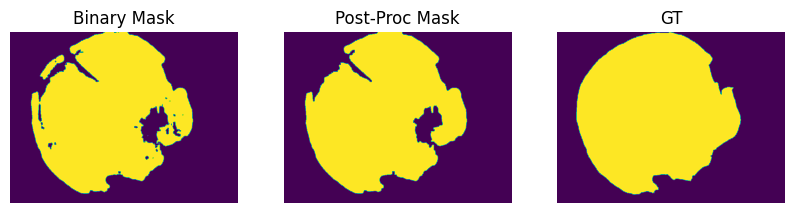

Dice score before postproc: 0.9488692879676819 vs after: 0.9469570517539978


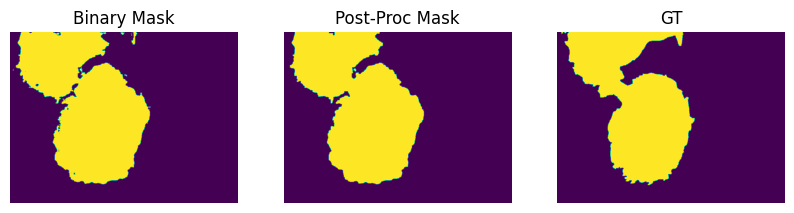

Dice score before postproc: 0.9057413339614868 vs after: 0.9059416055679321


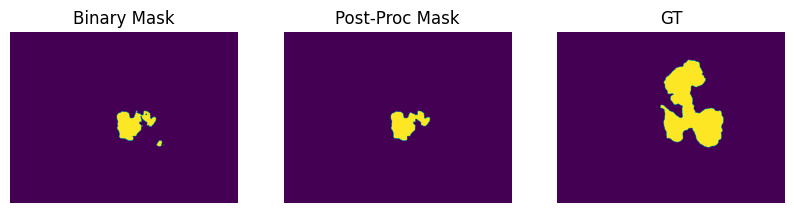

Dice score before postproc: 0.3717426061630249 vs after: 0.36111751198768616


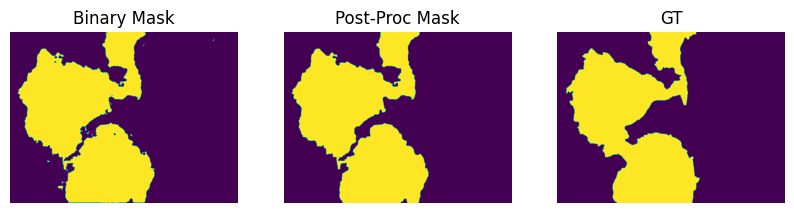

Dice score before postproc: 0.9352076053619385 vs after: 0.9383722543716431


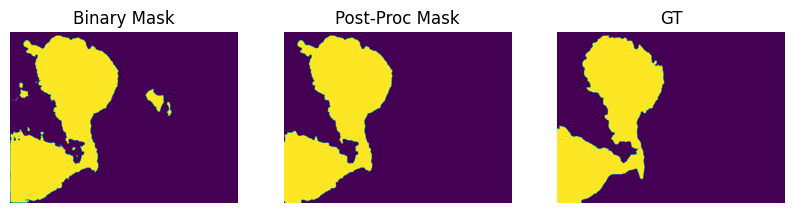

Dice score before postproc: 0.9308784604072571 vs after: 0.9489011168479919


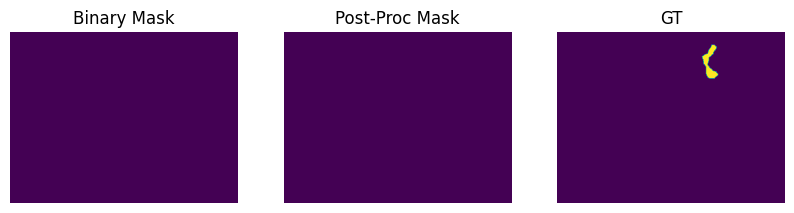

Dice score before postproc: 0.0 vs after: 0.0


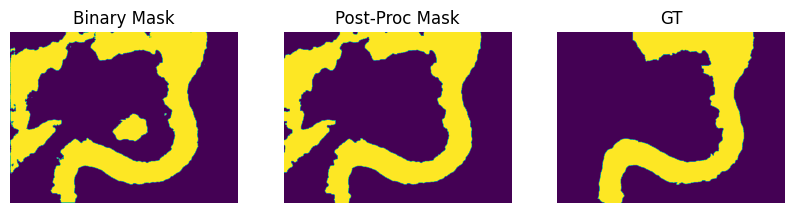

Dice score before postproc: 0.7725986242294312 vs after: 0.7951809167861938


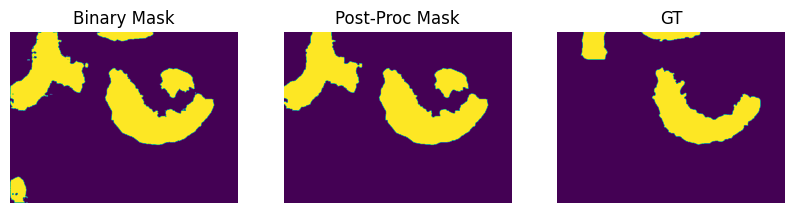

Dice score before postproc: 0.7018952369689941 vs after: 0.6865330934524536


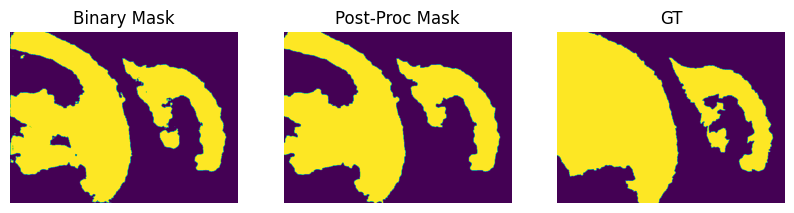

Dice score before postproc: 0.8854838013648987 vs after: 0.8826637864112854


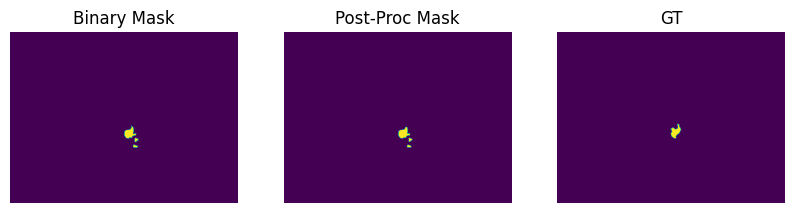

Dice score before postproc: 0.6727772951126099 vs after: 0.6728624701499939


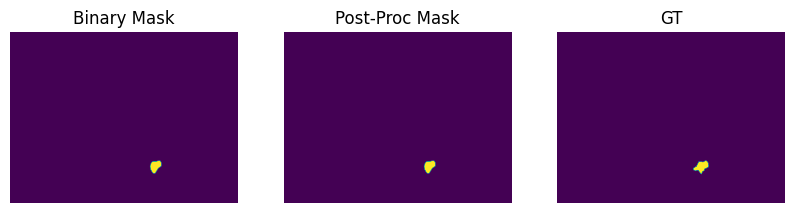

Dice score before postproc: 0.8830963373184204 vs after: 0.8841439485549927


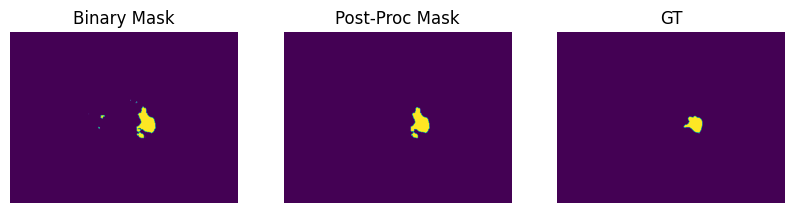

Dice score before postproc: 0.7230841517448425 vs after: 0.7426363825798035


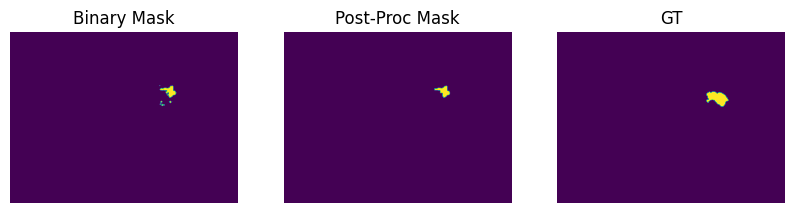

Dice score before postproc: 0.23445631563663483 vs after: 0.19925351440906525


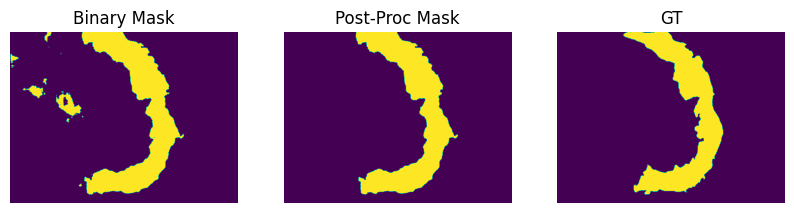

Dice score before postproc: 0.8898847103118896 vs after: 0.9324136972427368


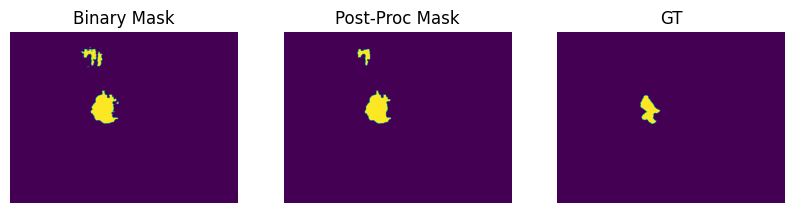

Dice score before postproc: 0.5719457268714905 vs after: 0.6140676140785217


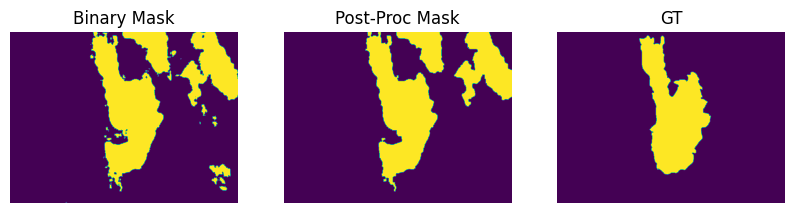

Dice score before postproc: 0.6804894804954529 vs after: 0.6973282694816589


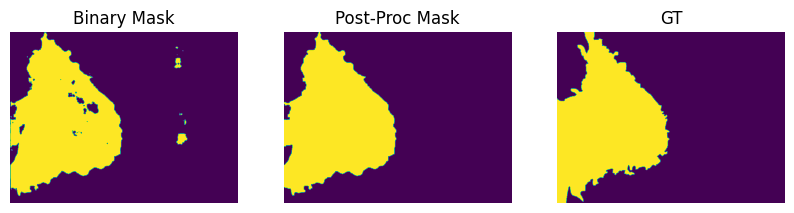

Dice score before postproc: 0.9347322583198547 vs after: 0.9510893821716309


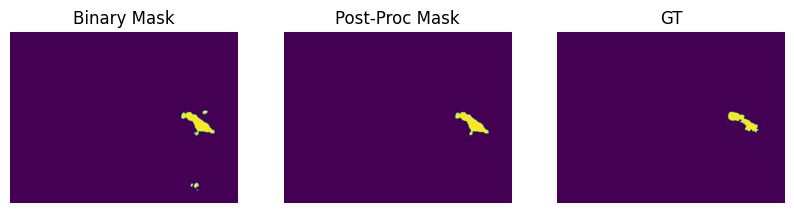

Dice score before postproc: 0.7487061619758606 vs after: 0.8044520020484924


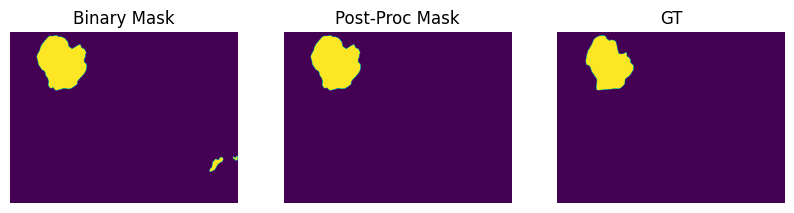

Dice score before postproc: 0.9060512185096741 vs after: 0.9295178651809692


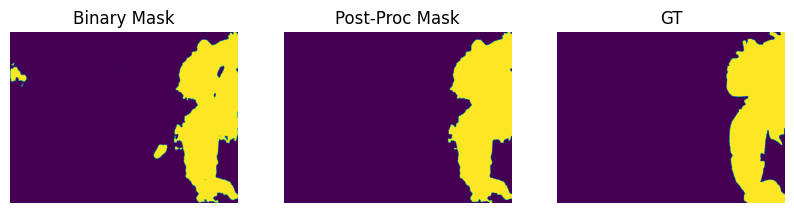

Dice score before postproc: 0.9305834770202637 vs after: 0.953036904335022


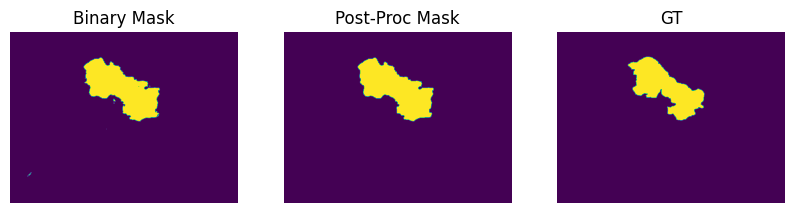

Dice score before postproc: 0.8854925036430359 vs after: 0.8888078927993774


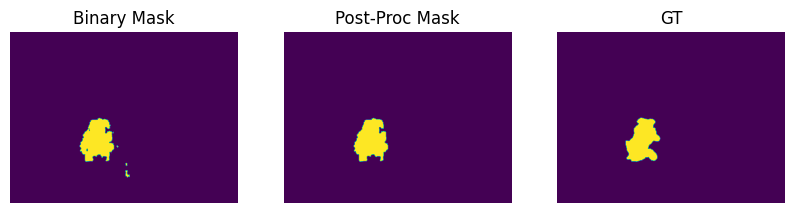

Dice score before postproc: 0.8510025143623352 vs after: 0.8620340824127197


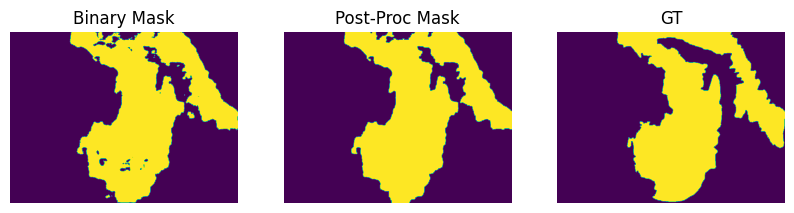

Dice score before postproc: 0.9115163087844849 vs after: 0.9165849685668945


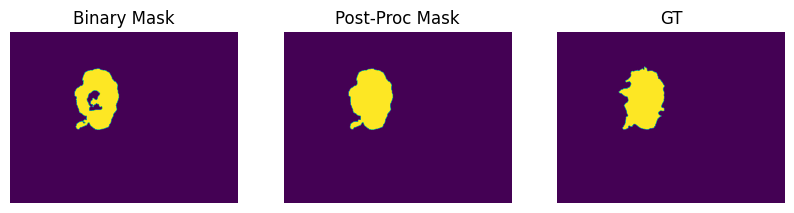

Dice score before postproc: 0.9033737778663635 vs after: 0.9467355608940125


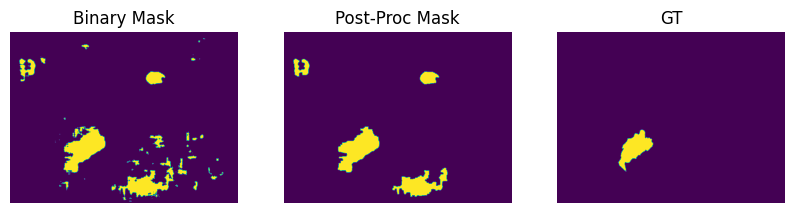

Dice score before postproc: 0.39668360352516174 vs after: 0.47411543130874634


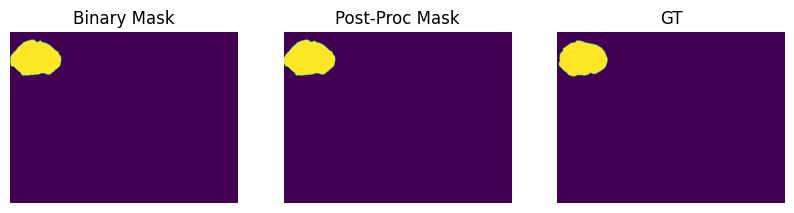

Dice score before postproc: 0.9628758430480957 vs after: 0.9627084136009216


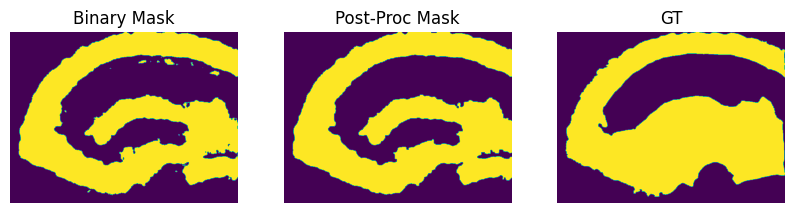

Dice score before postproc: 0.89317387342453 vs after: 0.8955690860748291


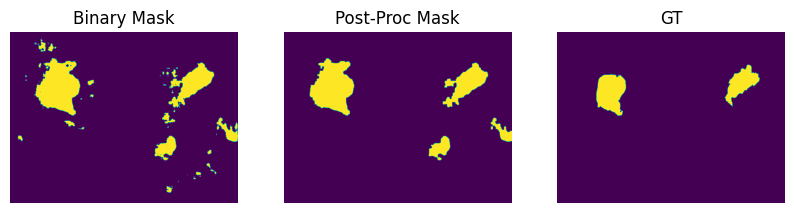

Dice score before postproc: 0.6164193153381348 vs after: 0.6706679463386536


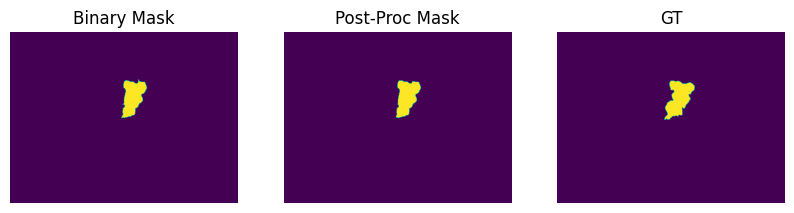

Dice score before postproc: 0.8979124426841736 vs after: 0.8984121084213257


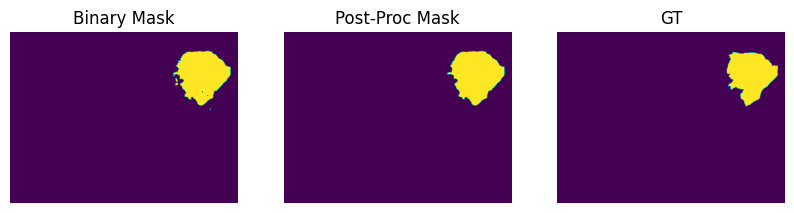

Dice score before postproc: 0.926581621170044 vs after: 0.9313772320747375


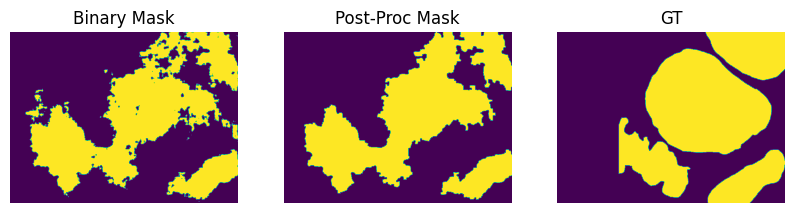

Dice score before postproc: 0.713577389717102 vs after: 0.7352907657623291


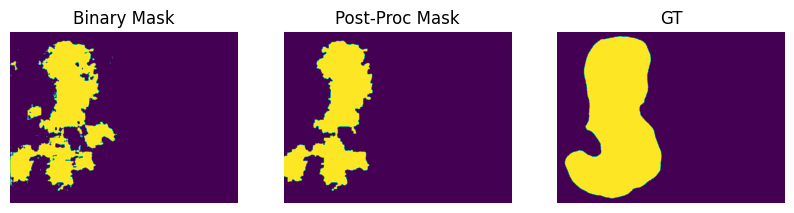

Dice score before postproc: 0.6668052077293396 vs after: 0.6544590592384338


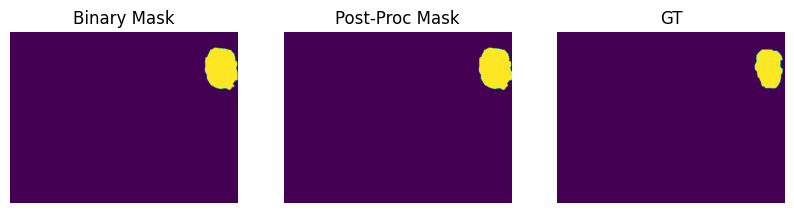

Dice score before postproc: 0.8722142577171326 vs after: 0.872275173664093


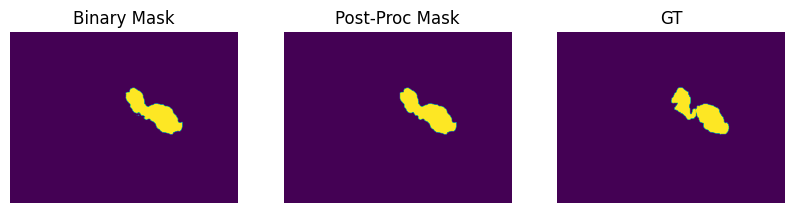

Dice score before postproc: 0.9102100133895874 vs after: 0.9097427129745483


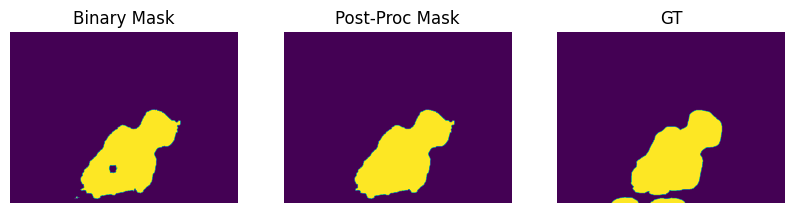

Dice score before postproc: 0.9359723925590515 vs after: 0.9413716197013855


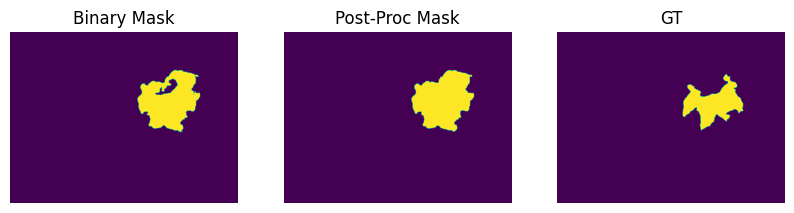

Dice score before postproc: 0.7573395371437073 vs after: 0.7337972521781921


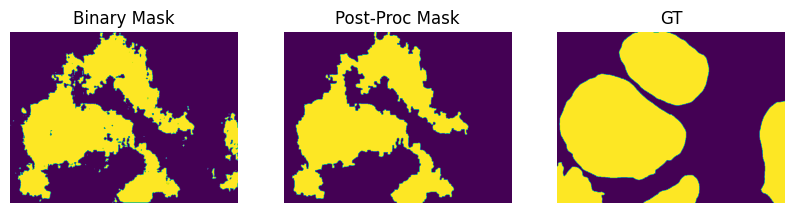

Dice score before postproc: 0.6966160535812378 vs after: 0.6698846220970154


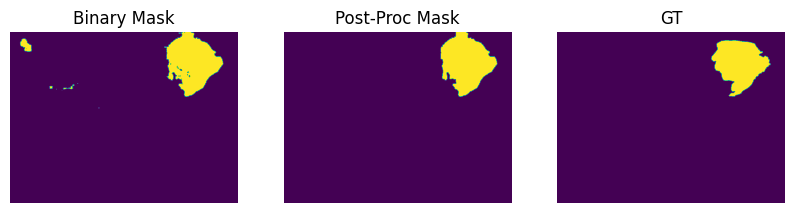

Dice score before postproc: 0.8951359987258911 vs after: 0.9214081764221191


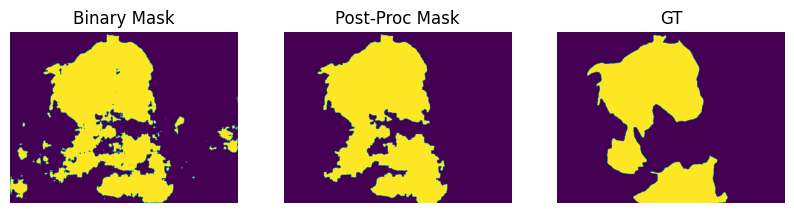

Dice score before postproc: 0.8136906623840332 vs after: 0.8457130789756775


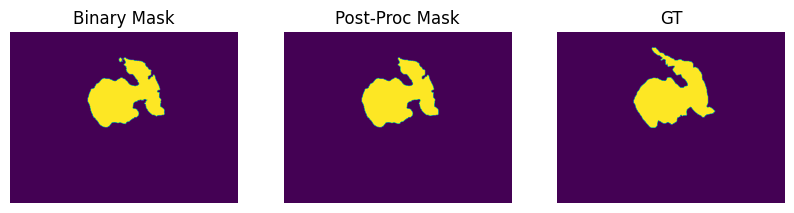

Dice score before postproc: 0.9303300976753235 vs after: 0.928067684173584


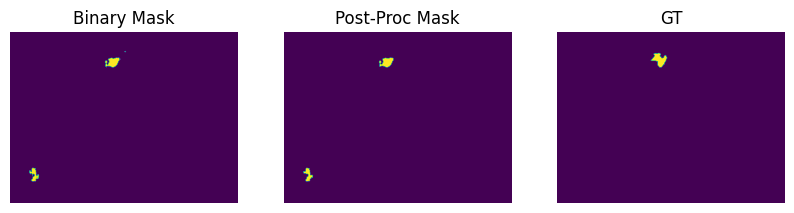

Dice score before postproc: 0.49600473046302795 vs after: 0.5018137693405151


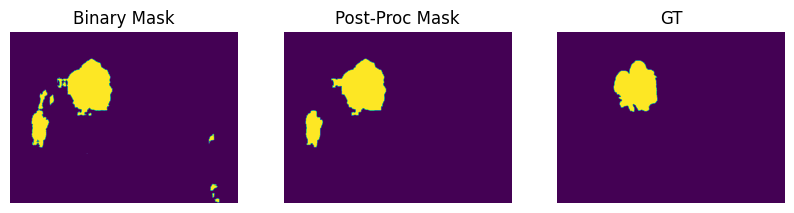

Dice score before postproc: 0.7772660255432129 vs after: 0.813449501991272


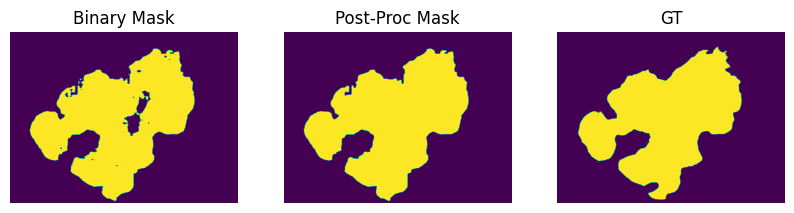

Dice score before postproc: 0.9484803676605225 vs after: 0.9647132754325867


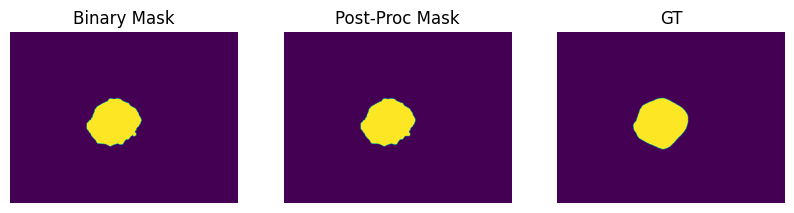

Dice score before postproc: 0.9524254202842712 vs after: 0.9526073336601257


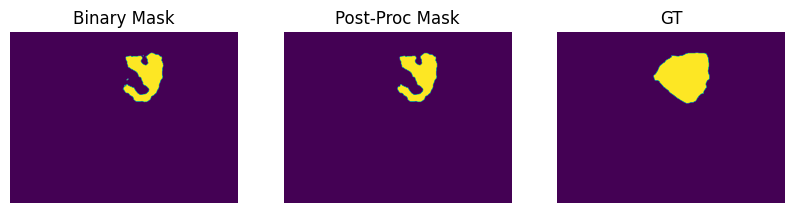

Dice score before postproc: 0.7025083899497986 vs after: 0.7006962895393372


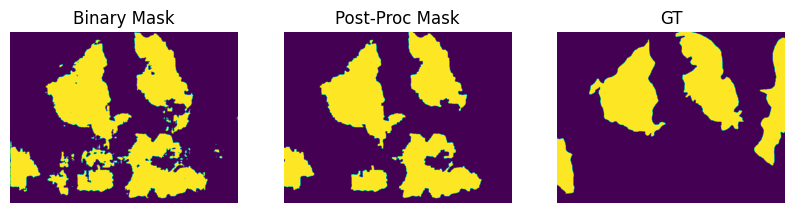

Dice score before postproc: 0.6209424734115601 vs after: 0.6310194730758667


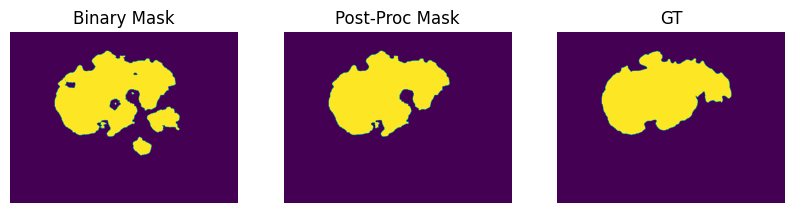

Dice score before postproc: 0.8565220832824707 vs after: 0.917495846748352


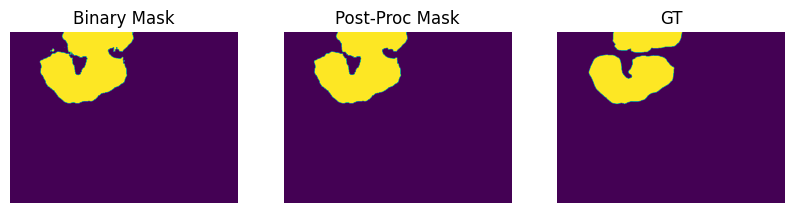

Dice score before postproc: 0.9361972212791443 vs after: 0.9378336668014526


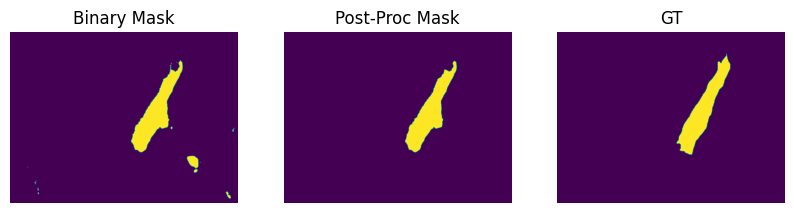

Dice score before postproc: 0.8593829274177551 vs after: 0.8983041644096375


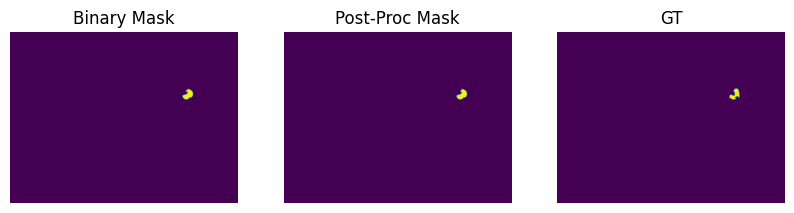

Dice score before postproc: 0.8519243597984314 vs after: 0.8567674160003662


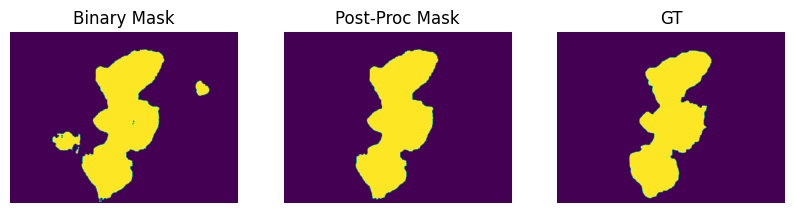

Dice score before postproc: 0.9208896160125732 vs after: 0.9563294649124146


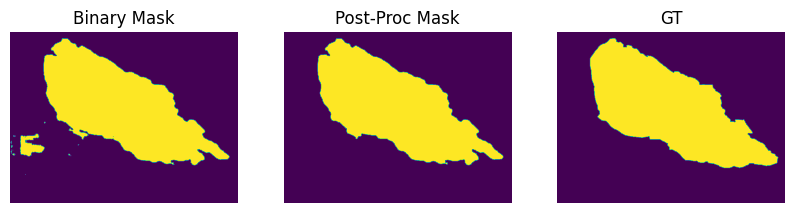

Dice score before postproc: 0.9551239013671875 vs after: 0.9686206579208374


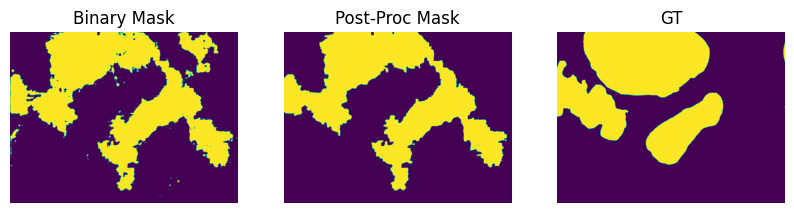

Dice score before postproc: 0.7084802389144897 vs after: 0.734110414981842
Av. dice score before preproc:  0.823236335497205 vs post:  0.8329656444404318


In [13]:
# Put validation data through, plotting image, prediction, ground truth each time
from tqdm import tqdm

threshold = 0.5
dice_coeff = 0.0
post_dice_coeff = 0.0
n = 0

# Perform loop without computing gradients
with torch.no_grad():
    for idx, (inputs, targets) in enumerate(val_loader):
        
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)

        dice_coeff += batch_dice_coeff(outputs>threshold, targets).detach().cpu().numpy()
        n += 1

        im = inputs[0].detach().cpu().permute(1,2,0).numpy()
        pred = threshold_mask(outputs[0][0].detach().cpu().numpy())
        gt = targets[0][0].detach().cpu().numpy()

        #plot_image(im, pred, gt)
        dice = dice_coefficient(torch.from_numpy(pred).float(), torch.from_numpy(gt).float())

        # Post-process mask
        post_proc_mask = np.clip(post_process_binary_mask(pred, threshold_fraction=0.1), 0, 1)

        post_proc_dice = dice_coefficient(torch.from_numpy(post_proc_mask).float(), torch.from_numpy(gt).float())

        post_dice_coeff += post_proc_dice
        
        # Plot prediction before and after processing
        fig, ax = plt.subplots(1, 3, figsize=(10, 5))
        ax[0].imshow(pred)
        ax[0].set_title('Binary Mask')
        ax[0].axis('off')

        ax[1].imshow(post_proc_mask)
        ax[1].set_title('Post-Proc Mask')
        ax[1].axis('off')

        ax[2].imshow(gt)
        ax[2].set_title('GT')
        ax[2].axis('off')

        plt.show()

        print(f"Dice score before postproc: {dice} vs after: {post_proc_dice}")

pre_proc_dice_av = dice_coeff/n
post_proc_dice_av = post_dice_coeff/n
print("Av. dice score before preproc: ", pre_proc_dice_av, "vs post: ", post_proc_dice_av)

In [11]:
post = post_process_binary_mask(pred)

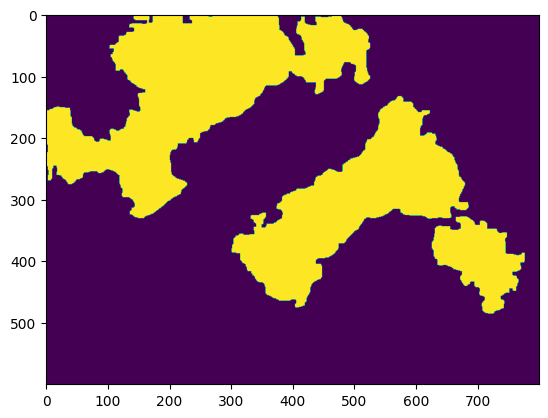

In [12]:
plt.imshow(post)